In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

def gaussian_process_maker(x_data, y_data, kernel, noise=0):
    '''
    given x,y data and a kernel function
    returns a gaussian process function that computes the mean and variance
    of a y prediction given an x_Test
    this encapsulates and optimizes the computation of the inverse
    of the covariance matrix
    '''
    n = x_data.shape[0]
    Sigma = np.zeros((n,n))
    for i in xrange(n):
        for j in xrange(i, n):
            k = kernel(x_data[i], x_data[j])
            Sigma[i,j], Sigma[j,i] = k, k
    
    Sigma += noise * np.eye(n)
    
    Sigma_inv = np.linalg.pinv(Sigma)

    def gaussian_process(x_test):
        k = np.atleast_2d([kernel(x_test, xi) for xi in x_data])
        mu_prime = k.dot(Sigma_inv).dot(y_data.T)
        sigma_prime = kernel(x_test, x_test) + noise - k.dot(Sigma_inv).dot(k.T)
        return float(mu_prime), float(sigma_prime)
    
    return gaussian_process

def plot_gaussian_process(process, x_data, y_data, x_min=-2, x_max=10, subintervals=1000, title=None):
    X = np.linspace(x_min, x_max, subintervals)
    MU_VAR = np.array([process(x) for x in X])
    MU, VAR = MU_VAR[:,0], MU_VAR[:,1]
    plt.scatter(x_data, y_data, color="black")
    plt.plot(X, MU, "black")
    plt.gca().fill_between(X, MU-VAR, MU+VAR, color="blue", alpha=.5)
    plt.title(title)
    plt.axis([x_min, x_max, -2., 2.])
    plt.show()
    plt.close()


data_xvals = np.array([1.0, 3, 5, 6, 7, 8])
data_yvals = np.sin(data_xvals)


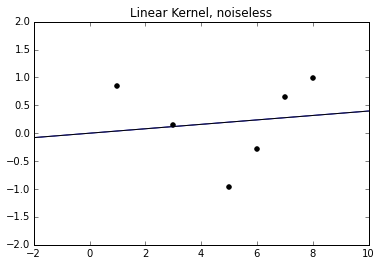

In [2]:
linear_kernel = lambda x,y: x*y
gp = gaussian_process_maker(data_xvals, data_yvals, linear_kernel)
plot_gaussian_process(gp, data_xvals, data_yvals, title="Linear Kernel, noiseless")


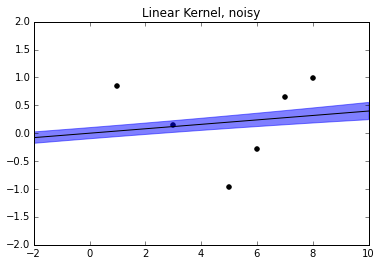

In [3]:
gp = gaussian_process_maker(data_xvals, data_yvals, linear_kernel, noise=.1)
plot_gaussian_process(gp, data_xvals, data_yvals, title="Linear Kernel, noisy")


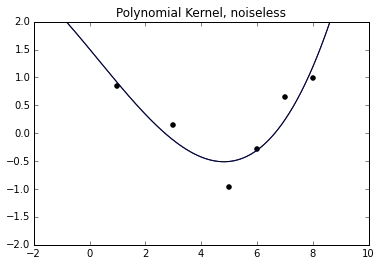

In [4]:
polynomial_kernel = lambda x,y,d=3: (1 + x*y)**d
gp = gaussian_process_maker(data_xvals, data_yvals, polynomial_kernel)
plot_gaussian_process(gp, data_xvals, data_yvals, title="Polynomial Kernel, noiseless")


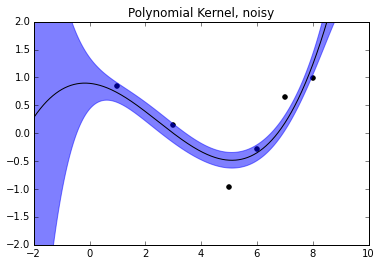

In [5]:
gp = gaussian_process_maker(data_xvals, data_yvals, polynomial_kernel, noise=.1)
plot_gaussian_process(gp, data_xvals, data_yvals, title="Polynomial Kernel, noisy")


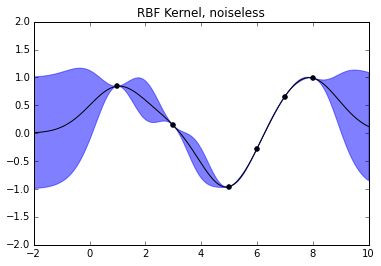

In [6]:
rbf_kernel = lambda x,y,s=1: np.exp(-(x-y)**2 / (2*s**2))
gp = gaussian_process_maker(data_xvals, data_yvals, rbf_kernel)
plot_gaussian_process(gp, data_xvals, data_yvals, title="RBF Kernel, noiseless")


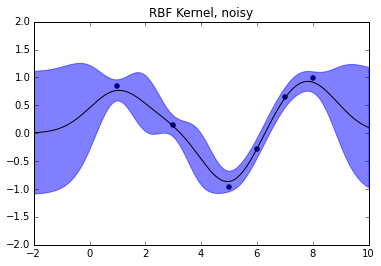

In [7]:
gp = gaussian_process_maker(data_xvals, data_yvals, rbf_kernel, noise=.1)
plot_gaussian_process(gp, data_xvals, data_yvals, title="RBF Kernel, noisy")
